
# Support Vector Machine (SVM) Classifier Exercise

This notebook will guide you through implementing an SVM classifier using Python's popular `scikit-learn` library. We will use the Iris dataset, specifically focusing on two features and two classes, to demonstrate the effectiveness of an SVM model and visualize its decision boundary.

## Objectives
- Understand how to build an SVM classifier.
- Learn how to visualize the decision boundary.
- Apply model evaluation techniques to assess performance.


In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Step 2: Load the Iris Dataset


We will use the Iris dataset from `scikit-learn`. To simplify visualization, we will use only the first two features (Sepal Length and Sepal Width) and two classes (Setosa and Versicolor).

In [2]:
iris = datasets.load_iris()

# Select only two features for easy visualization (Sepal length and Sepal width) and two classes
X = iris.data[iris.target != 2, :2]  # Use only the first two features and classes 0 & 1
y = iris.target[iris.target != 2]  # Use only classes 0 and 1

## Step 3: Split the Data into Training and Test Sets

We will split the dataset into training and testing sets using a 70/30 ratio.




In [3]:
# Split the dataset into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Step 4: Train the SVM Model

We will train an SVM classifier with a linear kernel.




In [4]:

# Initialize and train the SVM model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)


## Step 5: Visualize the Decision Boundary

To understand the decision-making of the SVM model, we will plot the decision boundary.




<ipython-input-5-088366dd4eea>:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, edgecolor='k', marker='x', cmap='coolwarm', alpha=0.8, label="Test Data")


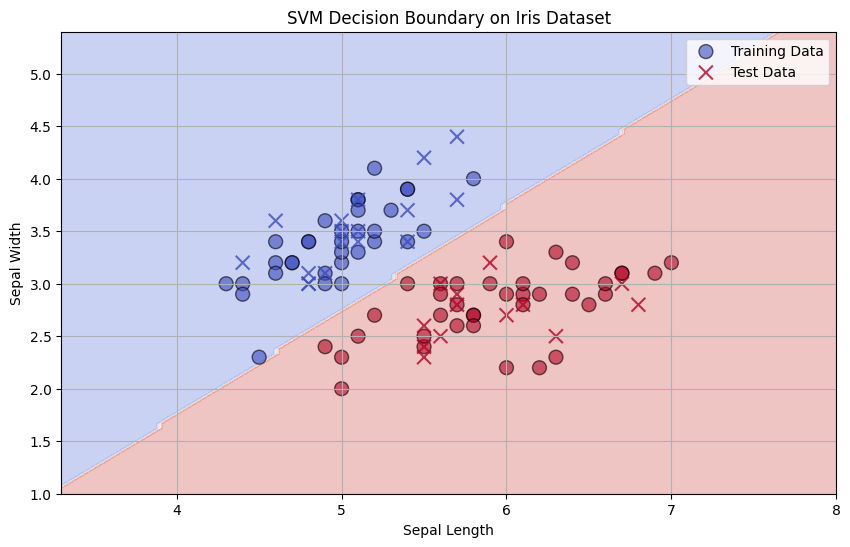

In [5]:

# Create a mesh to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Use the SVM model to predict over the mesh
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, edgecolor='k', cmap='coolwarm', alpha=0.6, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, edgecolor='k', marker='x', cmap='coolwarm', alpha=0.8, label="Test Data")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


## Step 6: Make Predictions and Evaluate the Model

We will now make predictions on the test set and evaluate the model's accuracy.



In [6]:
# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00




## Interpretation of the Results

- The **decision boundary** plot shows how the SVM model separates the two classes (Setosa and Versicolor) using a linear hyperplane.
- The **accuracy score** shows how well the model performed on the test set. In our case, the accuracy score is quite high, indicating good performance.

## Key Points

- Support Vector Machines (SVM) are powerful models, especially for binary classification tasks.
- The **linear kernel** was used here because of the simplicity of the data, but other kernels (e.g., RBF, polynomial) can be used for more complex datasets.
- SVMs try to maximize the margin between classes, making them effective in finding decision boundaries that generalize well to unseen data.

